In [1]:
import pandas as pd

## Checagem preliminar dos dados

In [2]:
df = pd.read_csv("..\data\external\ofertas_relampago.csv")

In [3]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [4]:
print(f"Os dados brutos são compostos por {df.shape[1]} features (colunas) e {df.shape[0]} amostras (linhas)")

Os dados brutos são compostos por 13 features (colunas) e 48746 amostras (linhas)


## Verificação gráfica de dados faltantes

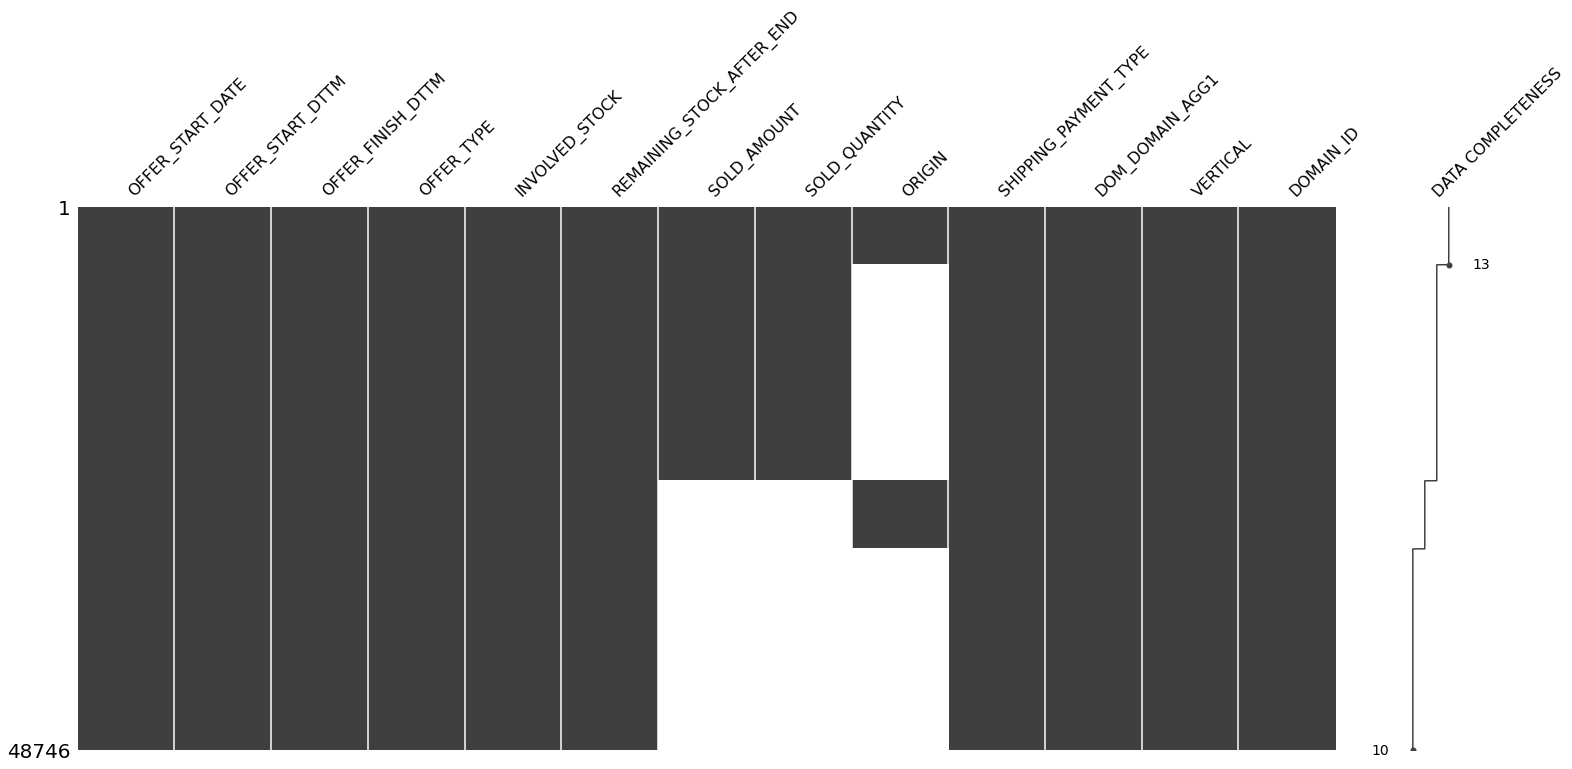

In [5]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

### Estrutura dos dados

## Verificação gráfica da dispersão dos valores das features numéricas

````python
lw=0: lw stands for line width. 0 means that we don’t want to show any lines
marker=".": Instead of lines, we tell the plot to use . as markers for each data point
subplots=True: subplots tells pandas to plot each feature in a separate subplot
layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.
````

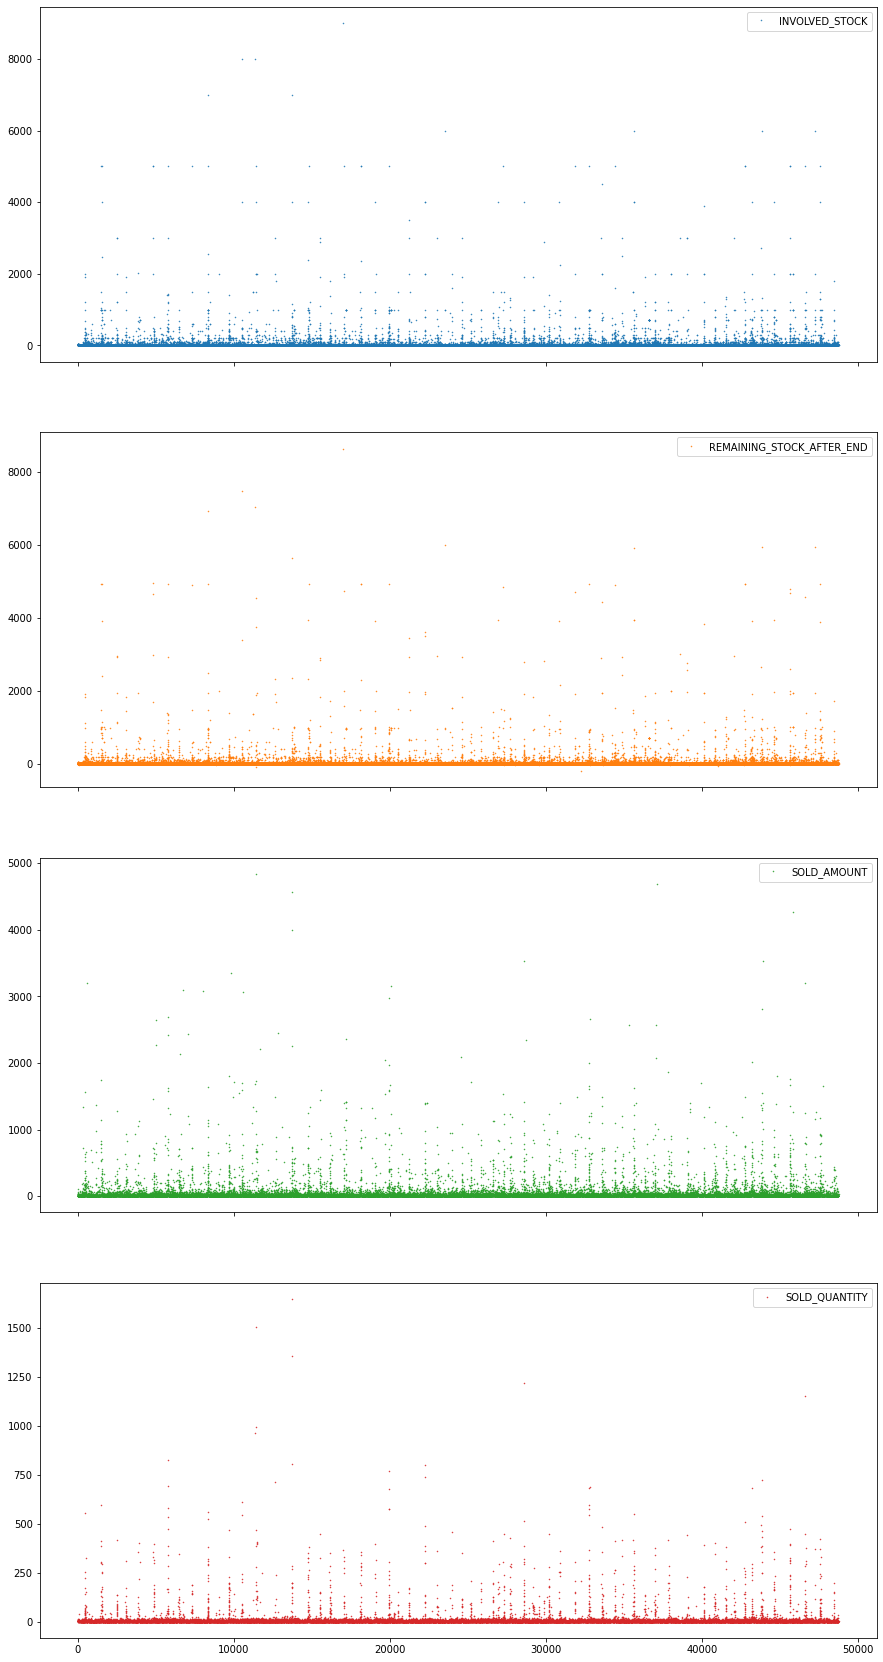

In [6]:
df.plot(lw=0, marker=".", subplots=True, layout=(4, -1),
          figsize=(15, 30), markersize=1);

Cada ponto nesta figura é uma amostra (ou seja, uma linha) em nosso conjunto de dados e cada subplot representa um feature (coluns) diferente. O eixo y mostra o valor da feature, enquanto o eixo x é o índice de amostra.

In [7]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


## Inspesção do tipo dos dados

In [8]:
# Importando as funções próprias de análise
from summary import print_type_info

In [9]:
df_info = print_type_info(df)
df_info

,Coluna,Type,Type_Count,Null_Count,None_Count,Unique_Valor
0,OFFER_START_DATE,object,61,0,0,"[2021-06-22, 2021-07-08, 2021-06-02, 2021-06-12, 2021-06-26, 2021-07-23, 202..."
1,OFFER_START_DTTM,object,783,0,0,"[2021-06-22 16:00:00+00:00, 2021-06-22 13:00:00+00:00, 2021-06-22 07:00:00+0..."
2,OFFER_FINISH_DTTM,object,7578,0,0,"[2021-06-22 23:02:43+00:00, 2021-06-22 19:00:02+00:00, 2021-06-22 13:00:01+0..."
3,OFFER_TYPE,object,1,0,0,[lightning_deal]
4,INVOLVED_STOCK,int64,505,0,0,"[4, 5, 15, 23, 10, 30, 9, 7, 6, 2, 8, 40, 20, 50, 47, 46, 28, 43, 3, 1, 13, ..."
5,REMAINING_STOCK_AFTER_END,int64,801,0,0,"[-2, 5, 12, 13, 0, 23, 10, -1, 26, 15, 7, 6, 1, 30, 14, 2, -4, 11, 40, 3, 8,..."
6,SOLD_AMOUNT,float64,7604,24167,0,"[4.72, nan, 10.73, 7.03, 39.65, 103.03, 10.65, 65.69, 12.32, 7.75, 4.48, 16...."
7,SOLD_QUANTITY,float64,374,24167,0,"[6.0, nan, 3.0, 2.0, 15.0, 11.0, 4.0, 9.0, 5.0, 1.0, 8.0, 10.0, 7.0, 12.0, 4..."
8,ORIGIN,object,2,37430,0,"[A, nan]"
9,SHIPPING_PAYMENT_TYPE,object,2,0,22088,"[none, free_shipping]"


## Quais dados fazem sentido para a análise?

### Fetures a serem __descartas__ do DataFrame base para as análises
- __OFFER_TYPE__: possui apenas 1 valor único. Por isso essa feature pode ser excluída do dataframe para análise, pois já sabemos que vamos analisar apenas um tipo de oferta.
- __ORIGIN__: possui 2 valores únicos. Mas um deles é __nan__. Ou seja essa feature podemos optar por excluir do dataframe de análise. Vamos supor que a origem é única na falta de informações adicionais.
- __SHIPPING_PAYMENT_TYPE__: possui 2 valores únicos. Mas um deles é __none__. Ou seja essa feature podemos optar por excluir do dataframe de análise. Vamos supor que a forma de pagamento da remessa é única na falta de informações adicionais.


In [10]:
df.head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS



### Descrição das fetures remanecentes

#### __Datas__

- __OFFER_START_DATE__: Data no formato Ano/Mês/Dia. __Min__: 2021-06-01, __Máx__: 2021-07-31
- __OFFER_START_DTTM__: Data no formato Ano/Mês/Dia Hora:00 +00:00. __Min__: 2021-06-01 07:00:00+00:00, __Máx__: 2021-07-31 19:00:00+00:00
- __OFFER_FINISH_DTTM__: Data no formato Ano/Mês/Dia Hora:00 +00:00. __Min__: 2021-06-01 07:00:00+00:00, __Máx__: 2021-08-01 03:00:00+00:00

#### __Valores de quantidade estoque, quantidade vendida e montante financeiro vendido__
- __INVOLVED_STOCK__: Valor de inteiro de estoque envolvido. __Min__: 1, __Máx__: 9000
- __REMAINING_STOCK_AFTER_END__: Valor inteiro de estoque após o fim. __Min__: -192, __Máx__: 8635
- __SOLD_AMOUNT__: Valor em fração de montante vendido. Provavelmente é o valor em moeda. __Min__: 0.28, __Máx__: 4836.57
- __SOLD_QUANTITY__: Quantidade vendida. __Min__: 1.0, __Máx__: 1646.0

#### __Domínios__
- __DOM_DOMAIN_AGG1__: Adregações de domínios
- __VERTICAL__: Grupos de agregados de domínios
- __DOMAIN_ID__: Domínio

In [11]:
drop_list = ["OFFER_TYPE", "ORIGIN", "SHIPPING_PAYMENT_TYPE"]


### Remoção de linhas duplicadas

In [12]:
len(df)

48746

In [13]:
dados_duplicados = df.duplicated().sum()
dados_duplicados

926

In [14]:
df1 = df.drop_duplicates()
len(df1)

47820

In [15]:
len(df) - dados_duplicados

47820

### Remoção das colunas com valores únicos

In [16]:
df2 = df1.drop(drop_list, axis = 1)
pd.set_option('display.max_rows', 10)
df2

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,NaN,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,15,0,39.65,15.0,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,15,9,16.28,6.0,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,5,5,NaN,NaN,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,5,3,16.62,2.0,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,5,1,38.79,4.0,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


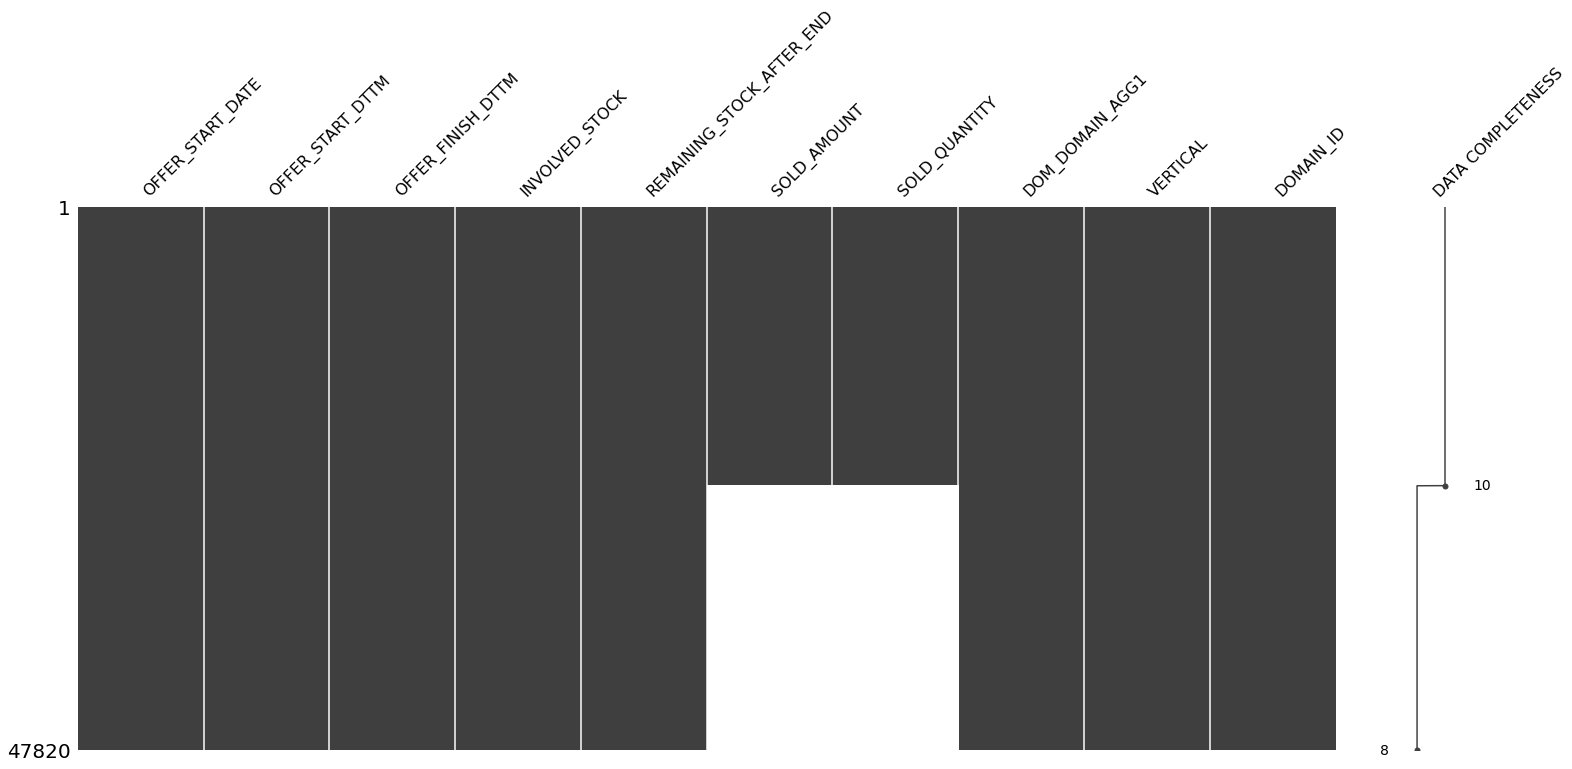

In [17]:
msno.matrix(df2, labels=True, sort="descending");

In [18]:
# Vamos gerar dois arquivos um com os dados de vendas e outro sem os dados de venda. 
# Os arquivos sem dados de vedna necessitam de informações complementares para serem análisados. Precisamso saber se não houveram vendas desses ou se 

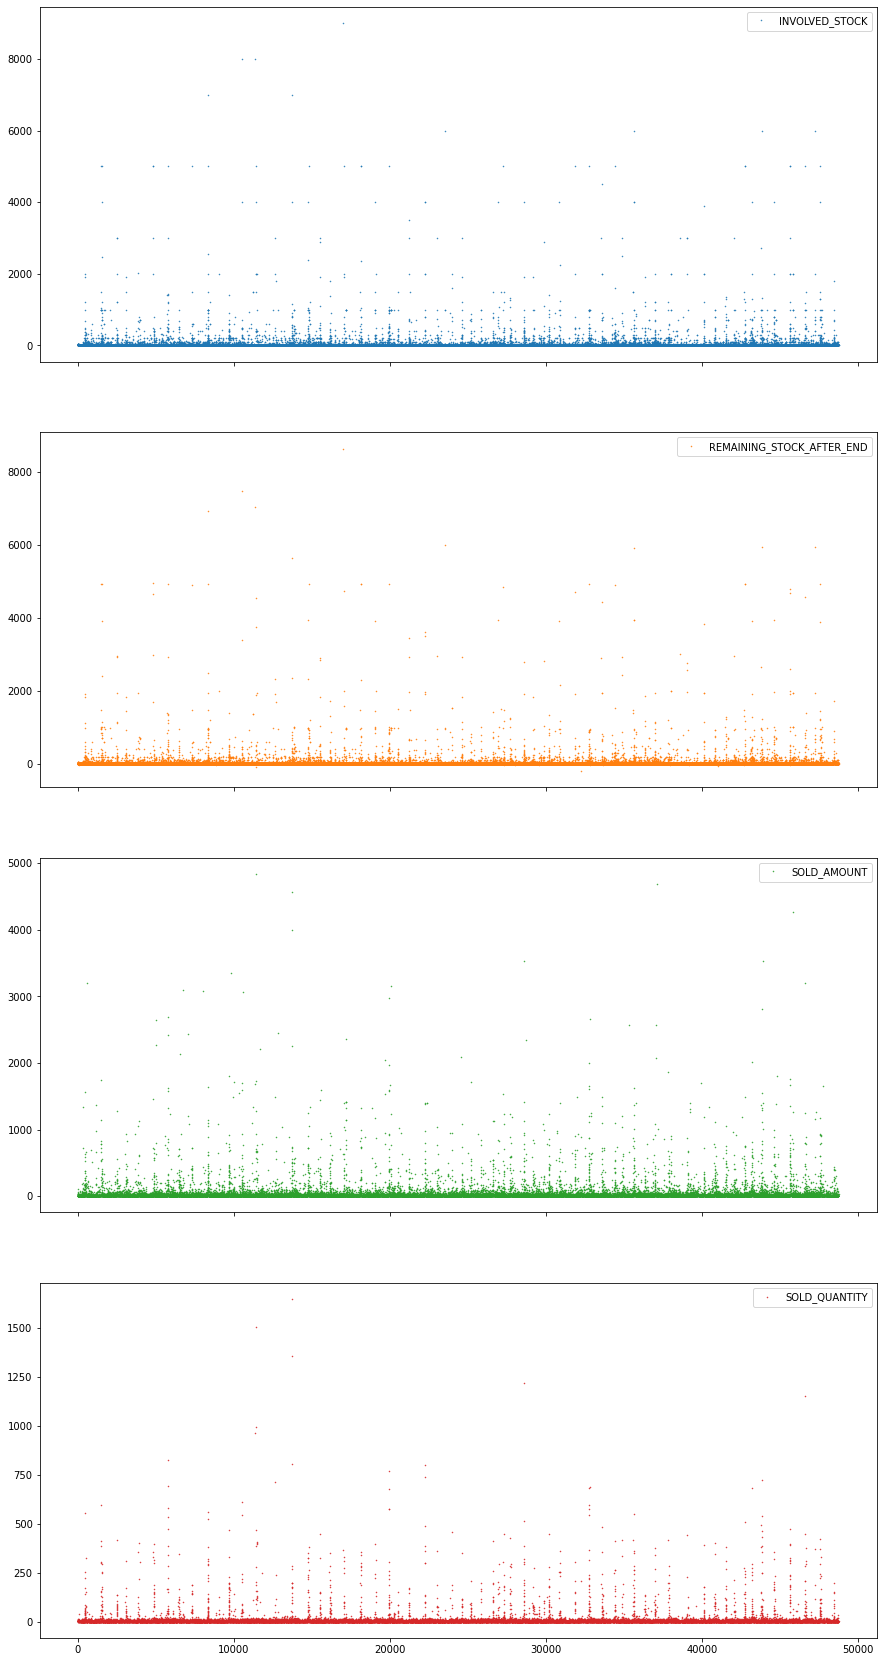

In [19]:
df2.plot(lw=0, marker=".", subplots=True, layout=(4, -1),
          figsize=(15, 30), markersize=1);

In [20]:
df2.query("SOLD_AMOUNT.isnull()", engine='python')

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,NaN,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,23,23,NaN,NaN,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,10,10,NaN,NaN,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,10,-1,NaN,NaN,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,15,15,NaN,NaN,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS
...,...,...,...,...,...,...,...,...,...,...
48736,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,10,10,NaN,NaN,MOBILE,CE,MLM-TELEPHONES
48738,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:01+00:00,10,10,NaN,NaN,MOBILE,CE,MLM-TELEPHONES
48739,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 21:00:00+00:00,30,30,NaN,NaN,HOME&DECOR,HOME & INDUSTRY,MLM-MIRRORS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,5,5,NaN,NaN,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS


#### O que significa um __REMAINING_STOCK_AFTER_END__ < 0? É um estoque que precisa ser reposto?
- Antes de maiores esclarecimentos essa linha será removida da análise. Além do mais requesenta um percentual pequeno dos dados, 2.64%

In [21]:
df2.query("REMAINING_STOCK_AFTER_END < 0", engine='python').head(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,PETS FOOD,CPG,MLM-BIRD_FOODS
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,10,-1,103.03,11.0,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,10,-1,NaN,NaN,COMPUTERS,CE,MLM-HEADPHONES
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,5,-4,12.18,9.0,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS
77,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,8,-1,12.61,9.0,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS


In [22]:
REMAINING_STOCK_AFTER_END_negativos = len(df2.query("REMAINING_STOCK_AFTER_END < 0", engine='python'))
REMAINING_STOCK_AFTER_END_negativos

1263

In [23]:
total_de_dados = len(df2)
total_de_dados

47820

In [24]:
print(f"Os REMAINING_STOCK_AFTER_END negativos representam {round(REMAINING_STOCK_AFTER_END_negativos/total_de_dados, 4)*100}%")

Os REMAINING_STOCK_AFTER_END negativos representam 2.64%


In [25]:
df2 = df2.query("REMAINING_STOCK_AFTER_END > 0", engine='python')
df2



,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,NaN,NaN,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,23,23,NaN,NaN,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,10,10,NaN,NaN,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,15,9,16.28,6.0,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,5,5,NaN,NaN,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,5,3,16.62,2.0,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,5,1,38.79,4.0,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


#### Como os estoques não se alteram quando SOLD_AMOUNT e SOLD_QUANTITY são NaN significa que representam produtos que não foram vendidos. 
#### Por isso serão substituídos por zero.

In [26]:
df2[['SOLD_AMOUNT', 'SOLD_QUANTITY']] = df2[['SOLD_AMOUNT', 'SOLD_QUANTITY']].fillna(0)
df2


C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_17824\2734834721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['SOLD_AMOUNT', 'SOLD_QUANTITY']] = df2[['SOLD_AMOUNT', 'SOLD_QUANTITY']].fillna(0)


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,0.00,0.0,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,23,23,0.00,0.0,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,10,10,0.00,0.0,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,15,9,16.28,6.0,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,5,5,0.00,0.0,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,5,3,16.62,2.0,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,5,1,38.79,4.0,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [27]:
from pathlib import Path  
filepath = Path('../data/processed/tratamento_0002.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df2.to_csv(filepath, index=False) 

In [28]:
load_path = '../data/processed/tratamento_0002.csv'
df_load = pd.read_csv(load_path)
df_load.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,0.00,0.0,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
1,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
2,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES
